# ROC曲线

绘制每个类别的ROC曲线，计算AUC值。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [3]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

--2022-08-12 22:41:04--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/environment/minico 100%[===================>]   9.58M  21.5MB/s    in 0.4s    

2022-08-12 22:41:05 (21.5 MB/s) - ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



## 导入工具包

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 载入类别名称和ID

In [5]:
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()
# 获得类别名称
classes = list(idx_to_labels.values())
print(classes)

['丝瓜', '人参果', '佛手瓜', '冬瓜', '南瓜', '哈密瓜', '木瓜', '甜瓜-伊丽莎白', '甜瓜-白', '甜瓜-绿', '甜瓜-金', '白兰瓜', '羊角蜜', '苦瓜', '西瓜', '西葫芦', '黄瓜']


## 载入测试集预测结果表格

In [6]:
df = pd.read_csv('测试集预测结果.csv')

In [7]:
df.head()

,图像路径,标注类别ID,标注类别名称,top-1-预测ID,top-1-预测名称,top-2-预测ID,top-2-预测名称,top-3-预测ID,top-3-预测名称,top-n预测正确,...,甜瓜-伊丽莎白-预测置信度,甜瓜-白-预测置信度,甜瓜-绿-预测置信度,甜瓜-金-预测置信度,白兰瓜-预测置信度,羊角蜜-预测置信度,苦瓜-预测置信度,西瓜-预测置信度,西葫芦-预测置信度,黄瓜-预测置信度
0,melon17_split/val/丝瓜/109.jpg,0,丝瓜,0.0,丝瓜,2.0,佛手瓜,12.0,羊角蜜,1.0,...,0.002193,0.014018,0.014891,0.003501,0.006260,0.092346,0.001454,0.003925,0.006661,0.001151
1,melon17_split/val/丝瓜/111.jpg,0,丝瓜,0.0,丝瓜,13.0,苦瓜,15.0,西葫芦,1.0,...,0.000567,0.000372,0.000705,0.002064,0.000421,0.072553,0.195918,0.000510,0.144077,0.048166
2,melon17_split/val/丝瓜/113.jpg,0,丝瓜,0.0,丝瓜,5.0,哈密瓜,11.0,白兰瓜,1.0,...,0.022293,0.033744,0.002499,0.009714,0.108798,0.044752,0.009132,0.011167,0.098024,0.035007
3,melon17_split/val/丝瓜/115.jpg,0,丝瓜,3.0,冬瓜,0.0,丝瓜,15.0,西葫芦,1.0,...,0.000888,0.003155,0.003725,0.001007,0.006776,0.002390,0.007951,0.001781,0.100773,0.006788
4,melon17_split/val/丝瓜/120.jpg,0,丝瓜,0.0,丝瓜,15.0,西葫芦,16.0,黄瓜,1.0,...,0.001660,0.000126,0.000372,0.003168,0.000812,0.015668,0.047193,0.000766,0.142601,0.080202


## 绘制某一类别的ROC曲线

In [8]:
specific_class = '冬瓜'

In [9]:
# 二分类标注
y_test = (df['标注类别名称'] == specific_class)

In [10]:
y_test

0      False
1      False
2      False
3      False
4      False
       ...  
504    False
505    False
506    False
507    False
508    False
Name: 标注类别名称, Length: 509, dtype: bool

In [11]:
# 二分类置信度
y_score = df['冬瓜-预测置信度']

In [12]:
y_score

0      0.073995
1      0.111391
2      0.107504
3      0.750537
4      0.044603
         ...   
504    0.042980
505    0.005824
506    0.046543
507    0.001666
508    0.006476
Name: 冬瓜-预测置信度, Length: 509, dtype: float64

In [13]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_score)

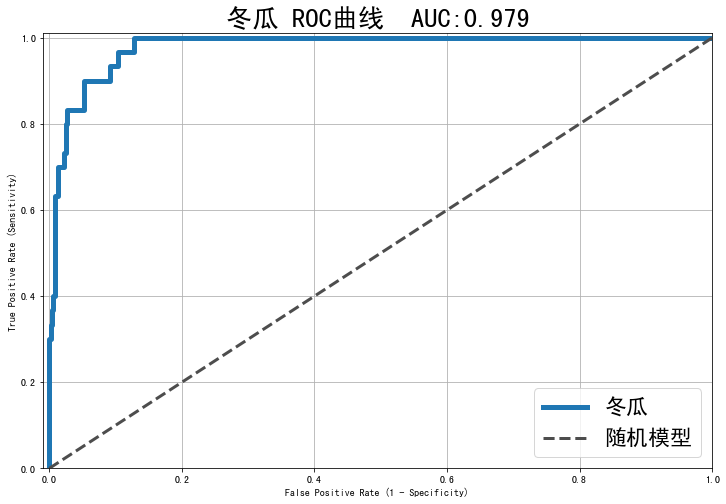

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, linewidth=5, label=specific_class)
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.rcParams['font.size'] = 22
plt.title('{} ROC曲线  AUC:{:.3f}'.format(specific_class, auc(fpr, tpr)))
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
auc(fpr, tpr)

0.9791927627000696

## 绘制所有类别的ROC曲线

In [25]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'dimgray', 'dimgrey', 'gray', 'rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'salmon', 'tomato', 'darksalmon', 'coral', 'orangered', 'lightsalmon', 'sienna', 'chocolate', 'saddlebrown', 'sandybrown', 'peachpuff', 'peru', 'darkorange', 'burlywood', 'tan', 'orange', 'wheat', 'darkgoldenrod', 'goldenrod', 'gold', 'khaki', 'palegoldenrod', 'darkkhaki', 'olive', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'greenyellow', 'chartreuse', 'lawngreen', 'darkseagreen', 'palegreen', 'lightgreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'springgreen', 'mediumspringgreen', 'mediumaquamarine', 'aquamarine', 'turquoise', 'lightseagreen', 'mediumturquoise', 'paleturquoise', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'aqua', 'cyan', 'darkturquoise', 'cadetblue', 'powderblue', 'lightblue', 'deepskyblue', 'skyblue', 'lightskyblue', 'steelblue', 'dodgerblue', 'lightslategray', 'lightslategrey', 'slategray', 'slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'midnightblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'thistle', 'plum', 'violet', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink', 'lavenderblush', 'palevioletred', 'crimson', 'pink', 'lightpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

In [26]:
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(2, 6)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [27]:
get_line_arg()

{'color': 'mediumspringgreen', 'linestyle': '-', 'linewidth': 2}

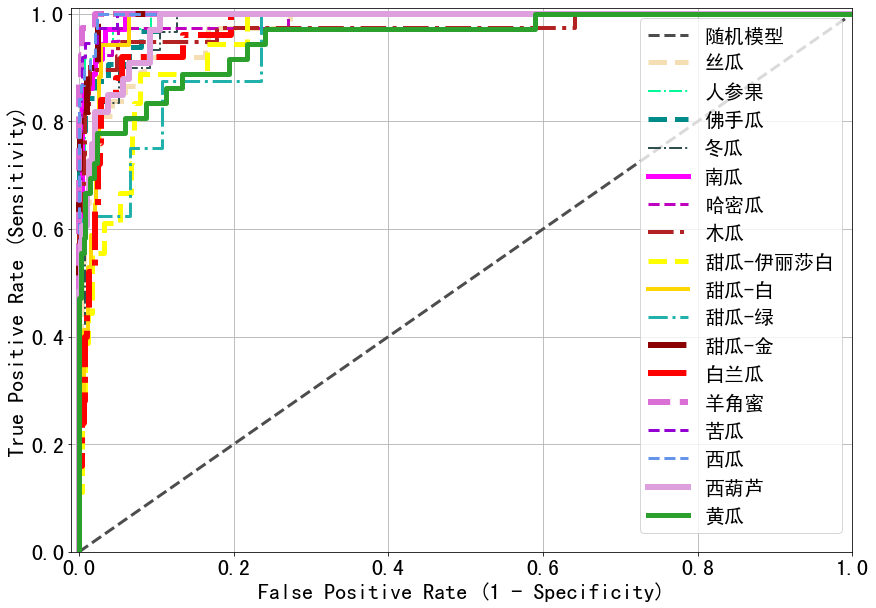

In [28]:
plt.figure(figsize=(14, 10))
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.plot([0, 1], [0, 1],ls="--", c='.3', linewidth=3, label='随机模型')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.rcParams['font.size'] = 22
plt.grid(True)

auc_list = []
for each_class in classes:
    y_test = list((df['标注类别名称'] == each_class))
    y_score = list(df['{}-预测置信度'.format(each_class)])
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, **get_line_arg(), label=each_class)
    plt.legend()
    auc_list.append(auc(fpr, tpr))

plt.legend(loc='best', fontsize=20)
plt.show()

## 将AUC增加至`各类别准确率评估指标`表格中

In [29]:
df_report = pd.read_csv('各类别准确率评估指标.csv')

In [30]:
df_report

,类别,precision,recall,f1-score,support
0,丝瓜,0.681818,0.810811,0.740741,37.0
1,人参果,0.846154,0.916667,0.880000,36.0
2,佛手瓜,0.961538,0.781250,0.862069,32.0
3,冬瓜,0.740741,0.666667,0.701754,30.0
4,南瓜,0.885714,0.861111,0.873239,36.0
5,哈密瓜,0.795455,0.897436,0.843373,39.0
6,木瓜,0.888889,0.842105,0.864865,38.0
7,甜瓜-伊丽莎白,0.500000,0.444444,0.470588,18.0
8,甜瓜-白,0.500000,0.647059,0.564103,17.0
9,甜瓜-绿,0.571429,0.500000,0.533333,8.0


In [31]:
# 计算 AUC值 的 宏平均 和 加权平均
macro_avg_auc = np.mean(auc_list)
weighted_avg_auc = sum(auc_list * df_report.iloc[:-2]['support'] / len(df))

In [32]:
auc_list.append(macro_avg_auc)
auc_list.append(weighted_avg_auc)

In [33]:
df_report['AUC'] = auc_list

In [34]:
df_report

,类别,precision,recall,f1-score,support,AUC
0,丝瓜,0.681818,0.810811,0.740741,37.0,0.971656
1,人参果,0.846154,0.916667,0.880000,36.0,0.993599
2,佛手瓜,0.961538,0.781250,0.862069,32.0,0.989845
3,冬瓜,0.740741,0.666667,0.701754,30.0,0.979193
4,南瓜,0.885714,0.861111,0.873239,36.0,0.994538
5,哈密瓜,0.795455,0.897436,0.843373,39.0,0.988925
6,木瓜,0.888889,0.842105,0.864865,38.0,0.973517
7,甜瓜-伊丽莎白,0.500000,0.444444,0.470588,18.0,0.953949
8,甜瓜-白,0.500000,0.647059,0.564103,17.0,0.983620
9,甜瓜-绿,0.571429,0.500000,0.533333,8.0,0.947355


In [35]:
df_report.to_csv('各类别准确率评估指标.csv', index=False)